# 분포 시각화

- 데이터가 처음 주어졌을 때, 변수들이 어떤 요소로 어느정도의 비율로 구성되어 있는지 확인
- 분포 시각화는 양적 척도인지, 질적 척도인지에 따라 구분
    - 양적 척도
        - 막대그래프, 선 그래프 , 히스토그램
            - 히스토그램은 처음에는 구간을 20개 정도로 세세하게 나누어서 분포를 살펴본 다음 시각적으로 봤을때 정보의 손실이 커지기 전까지 조금씩 구간의 개수를 줄임
            - 구간이 너무 많으면 보기 어렵고 , 너무 적으면 정보의 손실이 크기 때문에 시각화의 이점이 사라짐
    - 질적 척도
        - 구성이 단순한 경우
            - 파이차트 , 도넛차트
                - 전체를 100% 로 하여 구성 요소들의 분포 정도를 면적으로 표현
                - 시각적 표현만으로는 비율을 정확하게 알기 힘들기 때문에 쉬를 함께 표시해 주는 것이 좋음
                - 도넛차트는 가운데가 비어있어서 가운데 공간에 전체 값이나 단일 비율 값 등의 추가적인 정보를 넣을수있음
         
        - 구성이 복잡한 경우
            - 트리맵 차트
                - 하나의 큰 사각형을 구성요소의 비율에 따라 작은 사각형으로 쪼개어 분포를 표현
                    - 장점 : 사각형 안에 더 작은 사각형을 포함시켜서 위계구조를 표현할 수 있음
                        - 예) "바지" 영역이 "긴 바지" 와 "반바지"로 분리하여 구성
             
                    - 단점 : 구성요소들 간의 규모차이가 크면 표현 어려움(찌만해서 안보임요)
                 
              
            - 와플 차트
                - 일정한 네모난 조각들로 분포를 표현
                - 트리맵 차트처럼 위계구조를 표현하지는 못함
                - 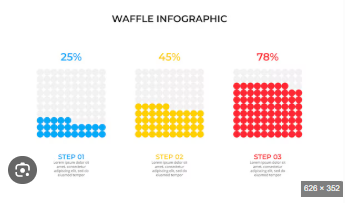

![image.png](attachment:cd1abfdd-75eb-46ab-b108-40cedf5d6f70.png)

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px # 
from pywaffle import Waffle # 와플차트

In [5]:
df = pd.read_csv("./data/six_countries_height_samples.csv")

In [6]:
df.head()

,id,country,sex,height_cm
0,rhop00001,AUSTRALIA,man,189
1,rhop00002,AUSTRALIA,man,165
2,rhop00003,AUSTRALIA,man,189
3,rhop00004,AUSTRALIA,man,164
4,rhop00005,AUSTRALIA,man,192


In [10]:
df["country"].unique()

array(['AUSTRALIA', 'DENMARK', 'ITALY', 'JAPAN', 'KOREA', 'TURKEY'],
      dtype=object)

- 6개국 성별별 신장 정보 데이터
- 각 국가의 샘플 수는 모두 동일

In [13]:
# 나라별 키의 평균을 구해보자
df_1 = df[["height_cm"]]

In [14]:
df_1

,height_cm
0,189
1,165
2,189
3,164
4,192
...,...
1063,161
1064,173
1065,170
1066,164


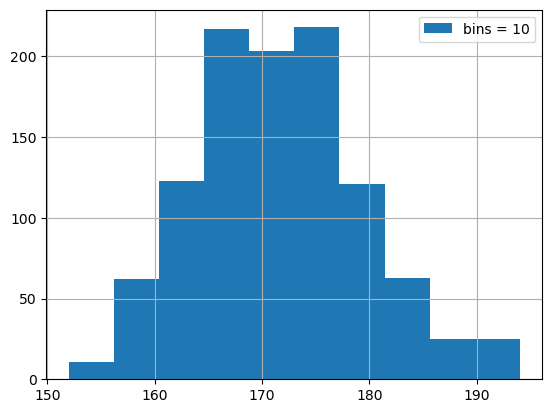

In [27]:
# 기본 히스토그램
plt.hist(
    df_1, 
    label = "bins = 10",
    bins = 10
)
plt.grid()
plt.legend()
plt.show()

### 봉오리 두개 : 두가지 성질을 가지고 있다는 뜻!

- 정규분포와 유사한 형태의 히스토그램
- 봉우리가 2개로 나와 남성과 여성의 신장분포가 다를 것으로 예상

In [29]:
df["sex"].value_counts()

sex
man      534
woman    534
Name: count, dtype: int64

In [32]:
# 남성 여성 별도 데이터셋 생성
df1_1 = df.loc[df["sex"] == "man", ["height_cm"]]
df1_2 = df.loc[df["sex"] == "woman", ["height_cm"]]

In [35]:
df1_1

,height_cm
0,189
1,165
2,189
3,164
4,192
...,...
974,181
975,179
976,178
977,181


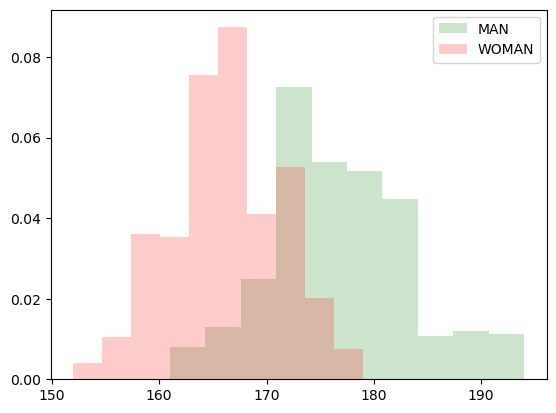

In [34]:
# 히스토그램
plt.hist(
    df1_1,
    color = "green",
    alpha = 0.2,
    bins = 10,
    label = "MAN",
    density = True,
)

plt.hist(
    df1_2,
    color = "red",
    alpha = 0.2,
    bins = 10,
    label = "WOMAN",
    density = True,
)

plt.legend()
plt.show()

- density = True : 데이터 개수가 아닌 비율로 표기한다

In [38]:
# 파이차트, 도넛차트 시각화를 위한 데이터 전처리
df2 = df[["country","height_cm"]]

# 키 175 이상만 추출
df2 = df2[df2["height_cm"] >= 175]

In [39]:
df2

,country,height_cm
0,AUSTRALIA,189
2,AUSTRALIA,189
4,AUSTRALIA,192
5,AUSTRALIA,177
7,AUSTRALIA,175
...,...,...
976,TURKEY,178
977,TURKEY,181
991,TURKEY,176
995,TURKEY,176


In [41]:
df2 = df2.groupby("country").count().reset_index()

In [42]:
df2

,country,height_cm
0,AUSTRALIA,68
1,DENMARK,59
2,ITALY,67
3,JAPAN,46
4,KOREA,52
5,TURKEY,61


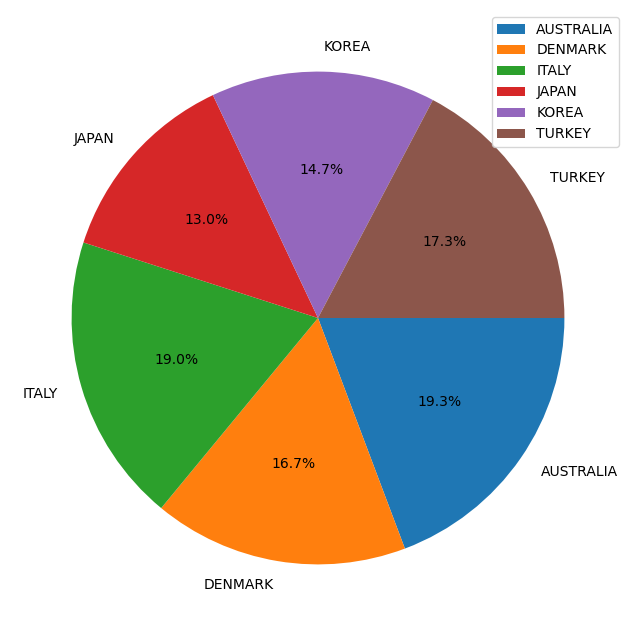

In [43]:
# 파이차트 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1, 1, 1)

ax.pie(
    df2["height_cm"],
    labels = df2["country"],
    counterclock = False,
    autopct = "%.1f%%"
)
plt.legend()
plt.show()

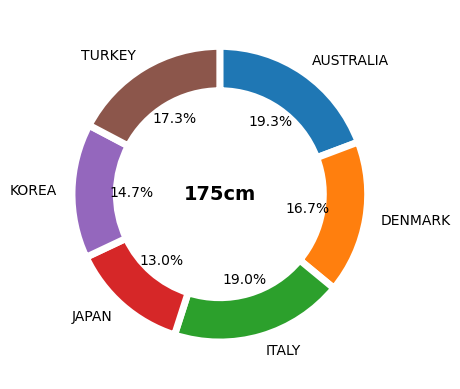

In [56]:
# 도넛차트 그리고 싶은디요?
wedgeprops = {
    "width" : 0.3, # 작을수록 반지름이 커진다
    "edgecolor" : "w",
    "linewidth" : 5
} # 파이차트의 여백

plt.pie(
    df2["height_cm"],
    labels = df2["country"],
    counterclock = False,
    autopct = "%.1f%%",
    startangle = 90,
    wedgeprops= wedgeprops
)
# text가 들어갈 위치
plt.text(0, 0, "175cm", ha = "center", va = "center", fontsize = 14, fontweight = "bold")


#plt.legend()
plt.show()

In [57]:
# 나라, 성별로 그룹화 175cm
df3 = df.loc[df["height_cm"] >= 175, ["country","sex","height_cm"]]
df3.head()

,country,sex,height_cm
0,AUSTRALIA,man,189
2,AUSTRALIA,man,189
4,AUSTRALIA,man,192
5,AUSTRALIA,man,177
7,AUSTRALIA,man,175


In [58]:
# 그룹화
df3 = df3.groupby(["country", "sex"]).count().reset_index()
df3

,country,sex,height_cm
0,AUSTRALIA,man,59
1,AUSTRALIA,woman,9
2,DENMARK,man,53
3,DENMARK,woman,6
4,ITALY,man,60
5,ITALY,woman,7
6,JAPAN,man,45
7,JAPAN,woman,1
8,KOREA,man,50
9,KOREA,woman,2


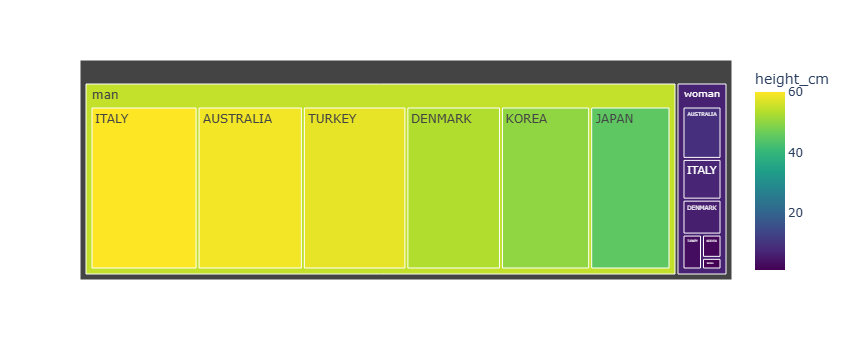

In [68]:
# 트리맵 차트 시각화 plotly 로 만 그릴수있다
fig = px.treemap(
    df3,
    path = ["sex", "country"],
    values = "height_cm",
    color  = "height_cm",
    color_continuous_scale = "viridis"
)
fig.show()

- 트리맵 차트는 우계구조를 표현하기 때문에 path 옵션으로 웨계구조 순서별 컬럼을 입력
- 위틔 차트에서는 성별로 먼저 구분하고 그 안에서 국가별 분포를 표현
- 시각화 트리맵 차트에서는 시낭 175cm 이상 샘플의 비율을 나타내므로 남성 - 이탈리아의 비중이 가장높음 , 여성 - 일본 의 비중이 가장 낮음

C:\Users\ITSC\AppData\Local\Temp\ipykernel_8936\1152222293.py:20: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



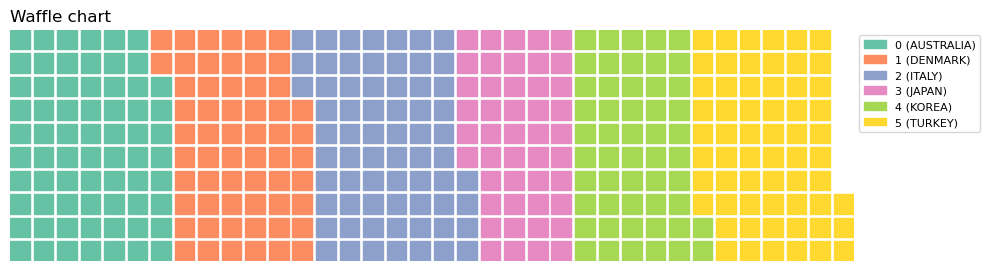

In [77]:
# 와플 차트 시각화
fig = plt.figure(
    FigureClass = Waffle,
    plots = {
        111: {
            "values": df2["height_cm"],
            "labels" : [f"{n} ({v})" for n, v in df2["country"].items()],
            "legend" : {
                
                        "loc": "upper left", 
                        "bbox_to_anchor": (1, 1), # bbox_to_anchor  
                        "fontsize": 8
            },
            "title": {"label" :"Waffle chart", "loc": "left"}
        }
    },
    rows = 10,
    figsize = (10,10)
)
fig.show()

# 와플 먹고싶다